In [3]:
from bs4 import BeautifulSoup

In [4]:
import requests as request

In [5]:
pageContent = request.get("https://www.worldometers.info/coronavirus/")

In [6]:
beautifulSoupObject = BeautifulSoup(pageContent.content,'html.parser')


<!DOCTYPE html>

<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID Live - Coronavirus Statistics - Worldometer</title>
<meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="6
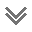

In [7]:
print(beautifulSoupObject)

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   COVID Live - Coronavirus Statistics - Worldometer
  </title>
  <meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="app
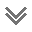

In [8]:
print(beautifulSoupObject.prettify())

In [9]:
 
mainCounterDiv=beautifulSoupObject.find_all('div', attrs={"class":"maincounter-number"})
print(mainCounterDiv)

[<div class="maincounter-number">
<span style="color:#aaa">286,998,295 </span>
</div>, <div class="maincounter-number">
<span>5,448,803</span>
</div>, <div class="maincounter-number" style="color:#8ACA2B ">
<span>253,347,836</span>
</div>]


In [10]:

totalCases,totalDeaths,totalRecovered= mainCounterDiv[0].get_text().strip(), mainCounterDiv[1].get_text().strip(), mainCounterDiv[2].get_text().strip()
print(totalCases)
print(totalDeaths)
print(totalRecovered)

286,998,295
5,448,803
253,347,836


In [11]:
mainTable = beautifulSoupObject.table #get table on the page
print(mainTable)

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br>Other</br></th>
<th width="20">Total<br>Cases</br></th>
<th width="30">New<br>Cases</br></th>
<th width="30">Total<br>Deaths</br></th>
<th width="30">New<br>Deaths</br></th>
<th width="30">Total<br>Recovered</br></th>
<th width="30">New<br>Recovered</br></th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New 

In [12]:
heading = mainTable.tr
body = mainTable.tbody
row = body.find_all("tr")

In [13]:
mainHeading = heading.find_all("th")
print(mainHeading)

[<th width="1%">#</th>, <th width="100">Country,<br>Other</br></th>, <th width="20">Total<br>Cases</br></th>, <th width="30">New<br>Cases</br></th>, <th width="30">Total<br>Deaths</br></th>, <th width="30">New<br>Deaths</br></th>, <th width="30">Total<br>Recovered</br></th>, <th width="30">New<br>Recovered</br></th>, <th width="30">Active<br/>Cases</th>, <th width="30">Serious,<br/>Critical</th>, <th width="30">Tot Cases/<br/>1M pop</th>, <th width="30">Deaths/<br/>1M pop</th>, <th width="30">Total<br/>Tests</th>, <th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>, <th width="30">Population</th>, <th style="display:none" width="30">Continent</th>, <th width="30">1 Case<br/>every X ppl</th>, <th width="30">1 Death<br/>every X ppl</th>, <th width="30">1 Test<br/>every X ppl</th>, <th width="30">New Cases/1M pop</th>, <th width="30">New Deaths/1M pop</th>, <th width="30">Active Cases/1M pop</th>]


In [14]:
headingList=[]
for ele in mainHeading:
  headingList.append(ele.get_text().strip())
print(headingList)

['#', 'Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical', 'Tot\xa0Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/\n1M pop', 'Population', 'Continent', '1 Caseevery X ppl', '1 Deathevery X ppl', '1 Testevery X ppl', 'New Cases/1M pop', 'New Deaths/1M pop', 'Active Cases/1M pop']


In [15]:
tableDataList = []
for ele in row:
  tdList = ele.find_all("td")
  tempList = []
  for data in tdList:
    tempList.append(data.get_text().strip())
  tableDataList.append(tempList)
print(tableDataList)

[['', 'North America', '65,480,238', '+8,579', '1,243,919', '+155', '50,245,246', '+1,390', '13,991,073', '23,517', '', '', '', '', '', 'North America', '', '', '', '', '', ''], ['', 'Asia', '84,576,780', '+33,973', '1,254,052', '+575', '81,840,116', '+38,440', '1,482,612', '28,617', '', '', '', '', '', 'Asia', '', '', '', '', '', ''], ['', 'South America', '39,730,255', '+238', '1,191,840', '', '37,621,575', '', '916,840', '12,847', '', '', '', '', '', 'South America', '', '', '', '', '', ''], ['', 'Europe', '86,887,791', '+89,737', '1,525,651', '+2,017', '74,576,658', '+147,382', '10,785,482', '22,480', '', '', '', '', '', 'Europe', '', '', '', '', '', ''], ['', 'Africa', '9,763,654', '+3,372', '228,821', '+20', '8,667,717', '+806', '867,116', '2,071', '', '', '', '', '', 'Africa', '', '', '', '', '', ''], ['', 'Oceania', '558,856', '+32,984', '4,505', '+15', '395,818', '+112', '158,533', '172', '', '', '', '', '', 'Australia/Oceania', '', '', '', '', '', ''], ['', '', '721', '', '15

In [17]:
import pandas as pd

In [18]:
dataFrame = pd.DataFrame(tableDataList,columns=headingList)
dataFrame

#  Country,Other  TotalCases NewCases TotalDeaths NewDeaths  \
0         North America  65,480,238   +8,579   1,243,919      +155   
1                  Asia  84,576,780  +33,973   1,254,052      +575   
2         South America  39,730,255     +238   1,191,840             
3                Europe  86,887,791  +89,737   1,525,651    +2,017   
4                Africa   9,763,654   +3,372     228,821       +20   
..   ...            ...         ...      ...         ...       ...   
227  220          Samoa           3                                  
228  221   Saint Helena           2                                  
229  222     Micronesia           1                                  
230  223          Tonga           1                                  
231  224          China     102,083     +193       4,636             

    TotalRecovered NewRecovered ActiveCases Serious,Critical  ...  \
0       50,245,246       +1,390  13,991,073           23,517  ...   
1       81,840,116      +38,440   1,482,612           28,617  ...   
2       37,621,575                  916,840           12,847  ...   
3       74,576,658     +147,382  10,785,482           22,480  ...   
4        8,667,717         +806     867,116            2,071  ...   
..             ...          ...         ...              ...  ...   
227              3                        0                   ...   
228              2                        0                   ...   
229              1                        0                   ...   
230              1                        0                   ...   
231         94,733          +42       2,714               15  ...   

      TotalTests Tests/\n1M pop     Population          Continent  \
0                                                   North America   
1                                                            Asia   
2                                                   South America   
3                                                          Europe   
4                                                          Africa   
..           ...            ...            ...                ...   
227                                    200,384  Australia/Oceania   
228                                      6,104             Africa   
229                                    116,824  Australia/Oceania   
230                                    107,484  Australia/Oceania   
231  160,000,000        111,163  1,439,323,776               Asia   

    1 Caseevery X ppl 1 Deathevery X ppl 1 Testevery X ppl New Cases/1M pop  \
0                                                                             
1                                                                             
2                                                                             
3                                                                             
4                                                                             
..                ...                ...               ...              ...   
227            66,795                                                         
228             3,052                                                         
229           116,824                                                         
230           107,484                                                         
231            14,100            310,467                 9              0.1   

    New Deaths/1M pop Active Cases/1M pop  
0                                          
1                                          
2                                          
3                                          
4                                          
..                ...                 ...  
227                                        
228                                        
229                                        
230                                        
231                                     2  

[232 rows x 22 columns]